In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [ ]:
import mplcyberpunk
import seaborn as sns
import pandas as pd
from bcb import sgs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

In [ ]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

<ipython-input-5-533cb06baa56>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
produto_cartaoconsignado = pd.read_csv('/content/drive/MyDrive/Dados/Produto/produto_cartaoconsignado.csv', sep=';')
produto_cartaoconsignado['Data'] = pd.to_datetime(produto_cartaoconsignado['Data'], format='%d/%m/%Y')

In [ ]:
produto_cartaoconsignado.head(50)

In [ ]:
produto_cartaoconsignado['ValorBase'] = produto_cartaoconsignado['ValorBase'].str.replace(',', '.').astype(float)

In [ ]:
plt.plot(produto_cartaoconsignado.ValorBase)

# PREVISÕES COM ARIMA PRODUTO CARTAO CONSIGNADO

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(produto_cartaoconsignado['ValorBase'], order=(3, 1, 3))
arima_fit = arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# Calcular o quadrado dos resíduos médios
mse = (arima_fit.resid).mean()
print(mse)

1735433.727148081


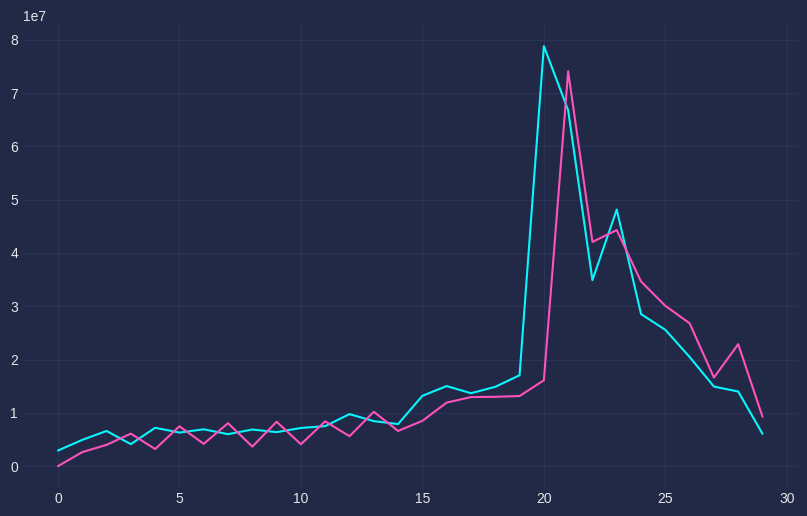

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(produto_cartaoconsignado.ValorBase)
plt.plot(arima_fit.predict(typ='levels'))

In [ ]:
#final da serie historica
produto_cartaoconsignado.ValorBase.tail(6).round()

24    28535298.0
25    25576312.0
26    20481285.0
27    14930382.0
28    13998816.0
29     6060997.0
Name: ValorBase, dtype: float64

In [ ]:
# RESULTADO ARIMA PARA OS PROXIMOS 6 MESES
previsão = (arima_fit.forecast(steps=6).round())
arima_fit.forecast(steps=6).round()

30    14760421.0
31    13288377.0
32    15509094.0
33    17588614.0
34    15879101.0
35    19031578.0
Name: predicted_mean, dtype: float64

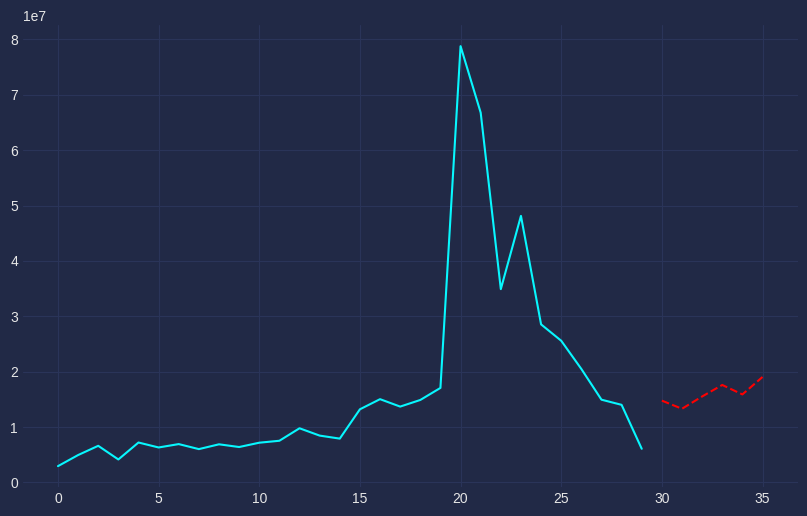

In [ ]:


plt.figure(figsize=(10, 6))
plt.plot(produto_cartaoconsignado.ValorBase)
plt.plot(previsão, color='red', linestyle='--', label='Previsão')